<a href="https://colab.research.google.com/github/Facco-Bruno/Alura-ML/blob/Master/Credit_Card_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
df.head()

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0  C10001    40.900749  ...          0.000000      12
1  C10002  3202.467416  ...          0.222222      12
2  C10003  2495.148862  ...          0.000000      12
3  C10004  1666.670542  ...          0.000000      12
4  C10005   817.714335  ...          0.000000      12

[5 rows x 18 columns]

In [4]:
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

In [5]:
df.head()

BALANCE  BALANCE_FREQUENCY  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT
0    40.900749           0.818182  ...        139.509787          0.000000
1  3202.467416           0.909091  ...       1072.340217          0.222222
2  2495.148862           1.000000  ...        627.284787          0.000000
3  1666.670542           0.636364  ...               NaN          0.000000
4   817.714335           1.000000  ...        244.791237          0.000000

[5 rows x 16 columns]

In [6]:
missing = df.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [7]:
df.fillna(df.median(), inplace=True)

In [8]:
missing = df.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [9]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values) 
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [11]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values,labels,metric='euclidean')
print(silhouette) 

0.3645572666991425


In [12]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.074932118299024


In [13]:
calinski = metrics.calinski_harabasz_score(values, labels) 
print(calinski)

3431.5806499092328


In [14]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [15]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.4405199082735


In [16]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.364439277430815 1.0758787031571042 3431.782548172111


In [17]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3514672020412369 1.116412700655961 3019.194810424829


In [18]:
import numpy as np
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2,dbs2, calinski2)

0.039799278628723594 3.5474524549892394 303.81527211724404
0.364439277430815 1.0758787031571042 3431.782548172111


In [19]:
set1, set2, set3 = np.array_split(values, 3)
w1, dbs1, calinski1 = clustering_algorithm(5, set1)
w2, dbs2, calinski2 = clustering_algorithm(5, set2)
w3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3272203126696238 1.0560676486660836 1204.0960326087895
0.364439277430815 1.1387697716670147 1194.9556797171288
0.3514672020412369 1.0984932613776761 1167.5309516804


<function matplotlib.pyplot.show>

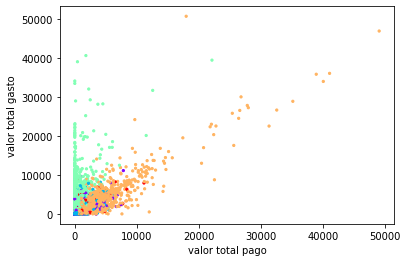

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

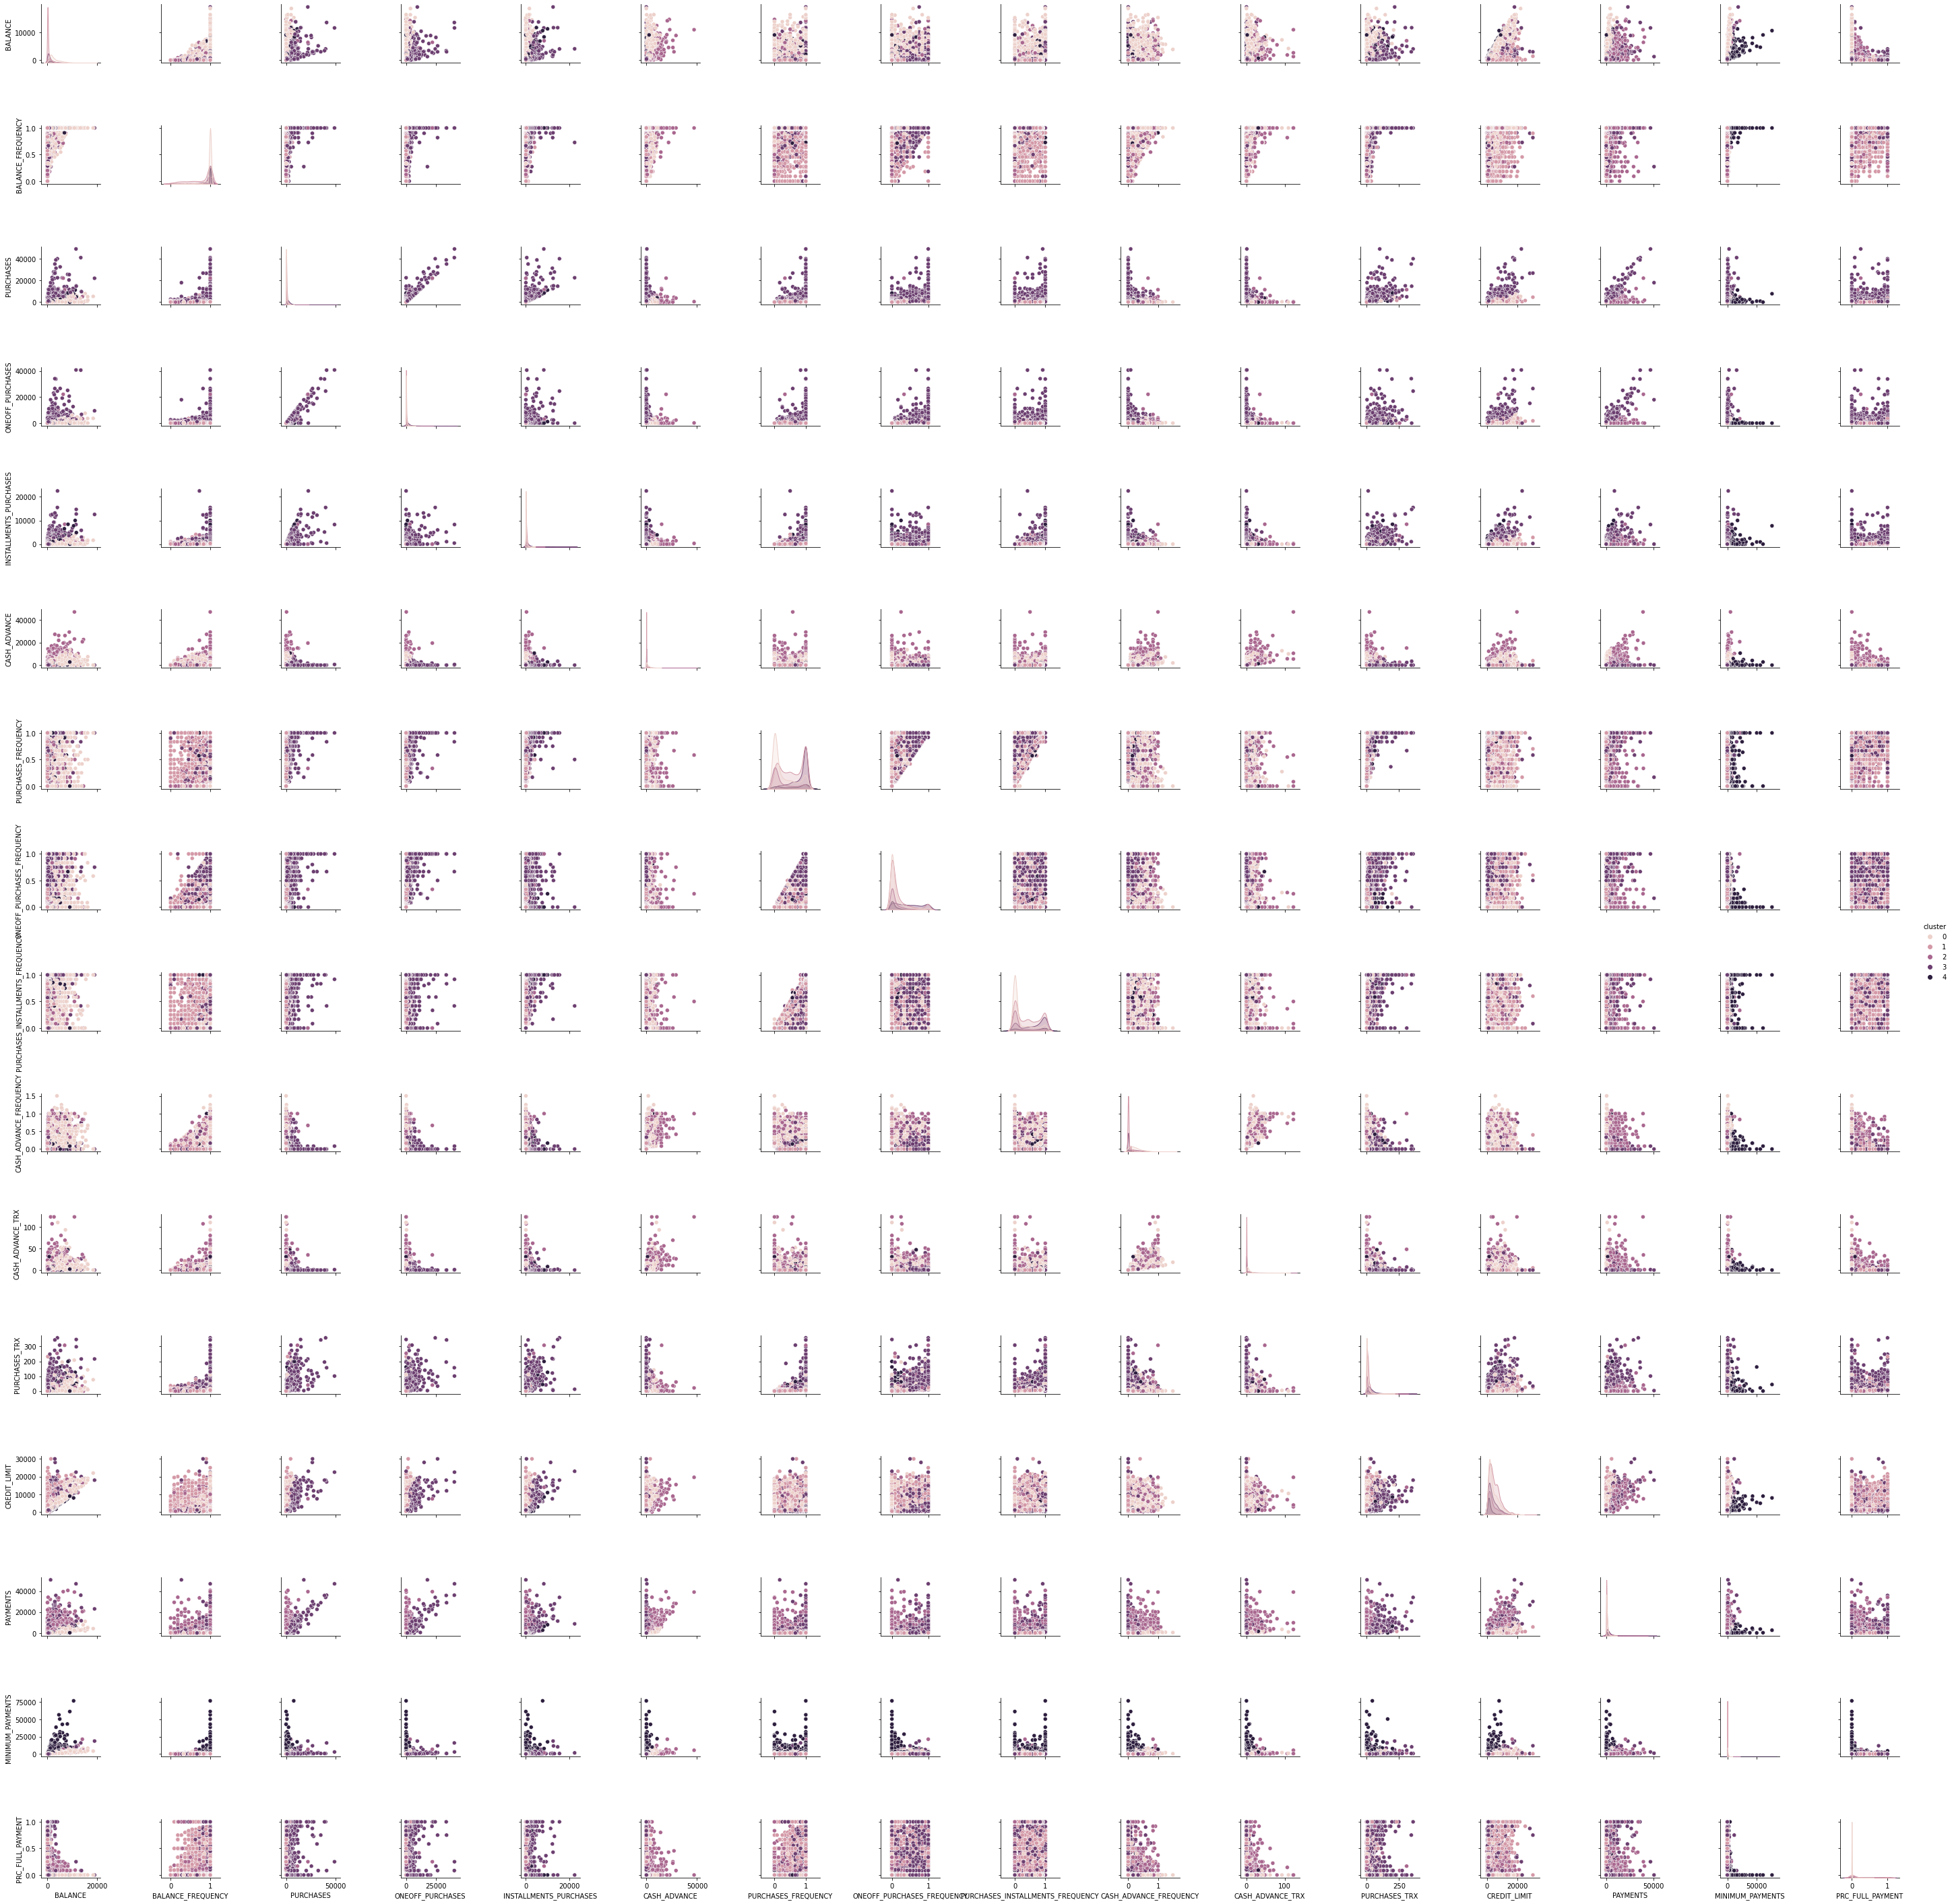

In [25]:
import seaborn as sns
df["cluster"] = labels
sns.pairplot(df[0:], hue="cluster")

In [27]:
df.groupby("cluster").describe()

BALANCE                            ... PRC_FULL_PAYMENT               
          count         mean          std  ...              50%       75%  max
cluster                                    ...                                
0        2643.0  3044.813952  2481.778827  ...         0.000000  0.000000  0.6
1        3283.0   444.410092   846.854678  ...         0.000000  0.444444  1.0
2        1081.0  1800.909055  1979.686042  ...         0.083333  0.142857  1.0
3        1544.0  1143.323704  1662.446912  ...         0.083333  0.545455  1.0
4         399.0  1963.743393  1836.283217  ...         0.000000  0.000000  1.0

[5 rows x 128 columns]

In [28]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.05989164e-01 2.73074755e-04 6.25843508e-02 3.68439095e-02
  2.57622119e-02 2.50057502e-01 6.83158347e-05 2.62481331e-05
  4.55565431e-05 5.70480115e-05 1.14571531e-03 1.34994337e-03
  7.18745256e-01 1.66305540e-01 1.80598456e-01 5.33805925e-07]
 [6.92595308e-02 2.30686023e-04 1.21382295e-01 4.79315402e-02
  7.35508613e-02 2.47153466e-02 1.72659283e-04 3.36343950e-05
  1.40157387e-04 7.96901589e-06 1.25450247e-04 2.86056694e-03
  9.43498125e-01 1.53749473e-01 5.68773030e-02 7.60565847e-05]
 [2.36713453e-01 2.16961764e-04 5.90293196e-02 3.35589818e-02
  2.54755090e-02 4.04460081e-01 5.16953900e-05 2.01969756e-05
  3.43732340e-05 6.61260673e-05 1.58762268e-03 1.09779947e-03
  5.37642538e-01 5.92146837e-01 1.04865812e-01 2.74145272e-05]
 [1.60282475e-01 2.44976409e-04 4.37904148e-01 2.56849464e-01
  1.81225639e-01 2.59402903e-02 2.04235686e-04 8.89741230e-05
  1.50490244e-04 9.43845624e-06 1.73362399e-04 6.16864361e-03
  6.02872332e-01 4.03908363e-01 8.57564447e-02 7.17211541e-05]
 [3.

In [30]:
max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0223
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0228
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0366
PAYMENTS 
0.0273
MINIMUM_PAYMENTS 
0.0557
PRC_FULL_PAYMENT 
0.0000


BALANCE 0.0224

PURCHASES 0.0196

CASH_ADVANCE 0.0226

CREDIT_LIMIT 0.0360

PAYMENTS 0.0280

In [32]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  ...     PAYMENTS  n_clients
cluster                            ...                        
0        3044.813952   388.852985  ...   968.013624       2643
1         444.410092   628.830816  ...   814.018733       3283
2        1800.909055   466.019473  ...  4667.483007       1081
3        1143.323704  3266.487766  ...  3044.597207       1544
4        1963.743393   850.298471  ...  1339.214906        399

[5 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


CLUSTER 0: Clientes que gastam pouco.

CLUSTER 1: Clientes que mais gastam. O foco deles é saque.

CLUSTER 2: Clientes que gastam muito com compras.

CLUSTER 3: Clientes que gastam muito com saques.

CLUSTER 4:

In [34]:
df.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        2643.0  0.001772  0.023232  0.0  0.0  0.000000  0.000000  0.6
1        3283.0  0.246580  0.346670  0.0  0.0  0.000000  0.444444  1.0
2        1081.0  0.115960  0.186377  0.0  0.0  0.083333  0.142857  1.0
3        1544.0  0.277309  0.366536  0.0  0.0  0.083333  0.545455  1.0
4         399.0  0.020108  0.092247  0.0  0.0  0.000000  0.000000  1.0

CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

O Cluster 0 está bastante claro na sua proposta e representam a maior quantidade de clientes, isto é, aqueles que gastam pouco e tem o maior limite, além de tudo são bons pagadores da fatura.

O Cluster 1 representa os clientes que amais gastam, com foco no uso de cartão para saque de dinheiro e são os piores pagadores.

O Cluster 2 representam os clientes que gastam com compras e pagam suas faturas adequadamente, o que reflete uma boa saúde financeira.

Cluster 3 possui uma quantidade padrão de clientes que gastam muito com saques.

Cluster 4 refletem os clientes com o menor limite no cartão e que não são bons pagadores de suas faturas, por sorte, representam a menor quantidade de clientes da empresa.